In [ ]:
# 기초실습

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다.
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외


In [5]:
# 원본 IMDb 데이터셋 다운로드
# import tensorflow as tf
# imdb = tf.keras.datasets.imdb

# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# 이번 실습에서는 미리 다운로드된 데이터셋을 불러와 활용하겠습니다
data_dir = os.path.join(os.getenv('HOME') + '/data/')

x_train = np.load(data_dir + 'imdb_x_train.npy', allow_pickle=True)
y_train = np.load(data_dir + 'imdb_y_train.npy', allow_pickle=True)
x_test = np.load(data_dir + 'imdb_x_test.npy', allow_pickle=True)
y_test = np.load(data_dir + 'imdb_y_test.npy', allow_pickle=True)
print(f"훈련 샘플 개수: {len(x_train)}, 테스트 개수: {len(x_test)}")

훈련 샘플 개수: 25000, 테스트 개수: 25000


In [6]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


In [7]:
# word_to_index = imdb.get_word_index()
word_to_index = np.load(data_dir + 'imdb_word_to_index.pickle', allow_pickle=True)
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다.
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


In [8]:
# word_to_index = imdb.get_word_index()
word_to_index = np.load(data_dir + 'imdb_word_to_index.pickle', allow_pickle=True)
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다.
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


In [9]:
# 보정 전 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))

as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of

In [16]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다.
print(word_to_index['the'])  # 4 이 출력됩니다.
print(index_to_word[4])     # 'the' 가 출력됩니다.

# 보정 후 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))

<BOS>
4
the
this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for

In [17]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [18]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다.
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [19]:
def pad_sequences(data, maxlen):
    padded_data = []
    for sentence in data:
        if len(sentence) < maxlen:
            sentence = sentence + [0] * (maxlen - len(sentence))
        else:
            sentence = sentence[:maxlen]
        padded_data.append(sentence)
    return np.array(padded_data)

x_train_padded = pad_sequences(x_train, maxlen)
x_test_padded = pad_sequences(x_test, maxlen)

x_train_tensor = torch.tensor(x_train_padded, dtype=torch.long)
x_test_tensor = torch.tensor(x_test_padded, dtype=torch.long)

print(x_train_tensor.shape)

torch.Size([25000, 580])


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, word_vector_dim):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)
        self.lstm = nn.LSTM(word_vector_dim, 8, batch_first=True)
        self.fc1 = nn.Linear(8, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, (hn, cn) = self.lstm(x)
        x = x[:, -1, :]
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = SentimentModel(vocab_size, word_vector_dim)
print(model)

SentimentModel(
  (embedding): Embedding(10000, 16)
  (lstm): LSTM(16, 8, batch_first=True)
  (fc1): Linear(in_features=8, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [21]:
# validation set 10000건 분리
x_val = x_train_tensor[:10000]
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train_tensor[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

torch.Size([15000, 580])
(15000,)


In [22]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

optimizer = optim.Adam(model.parameters())
loss_fn = torch.nn.BCELoss()

partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
partial_y_train_tensor = torch.tensor(partial_y_train, dtype=torch.float)

x_val_tensor = torch.tensor(x_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.float)

train_dataset = TensorDataset(partial_x_train_tensor, partial_y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

epochs = 30   # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_losses.append(running_loss / len(train_loader))
    train_accs.append(correct / total)

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)

            val_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float()
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_accs.append(val_correct / val_total)

    print(f"Epoch {epoch+1}/{epochs} - "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f} - "
          f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accs[-1]:.4f}")

/tmp/ipykernel_4702/1424571675.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
/tmp/ipykernel_4702/1424571675.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val_tensor = torch.tensor(x_val, dtype=torch.long)


Epoch 1/30 - Train Loss: 0.6937, Train Accuracy: 0.4945 - Validation Loss: 0.6932, Validation Accuracy: 0.4977
Epoch 2/30 - Train Loss: 0.6931, Train Accuracy: 0.5061 - Validation Loss: 0.6933, Validation Accuracy: 0.4977
Epoch 3/30 - Train Loss: 0.6932, Train Accuracy: 0.5066 - Validation Loss: 0.6932, Validation Accuracy: 0.4991
Epoch 4/30 - Train Loss: 0.6929, Train Accuracy: 0.5094 - Validation Loss: 0.6932, Validation Accuracy: 0.4999
Epoch 5/30 - Train Loss: 0.6927, Train Accuracy: 0.5094 - Validation Loss: 0.6931, Validation Accuracy: 0.5013
Epoch 6/30 - Train Loss: 0.6926, Train Accuracy: 0.5097 - Validation Loss: 0.6929, Validation Accuracy: 0.5006
Epoch 7/30 - Train Loss: 0.6925, Train Accuracy: 0.5106 - Validation Loss: 0.6929, Validation Accuracy: 0.5001
Epoch 8/30 - Train Loss: 0.6923, Train Accuracy: 0.5119 - Validation Loss: 0.6930, Validation Accuracy: 0.5006
Epoch 9/30 - Train Loss: 0.6922, Train Accuracy: 0.5033 - Validation Loss: 0.6931, Validation Accuracy: 0.4999
E

In [23]:
test_dataset = TensorDataset(x_test_tensor, torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)

        test_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_correct / test_total:.4f}")

Test Loss: 0.7213, Test Accuracy: 0.5052


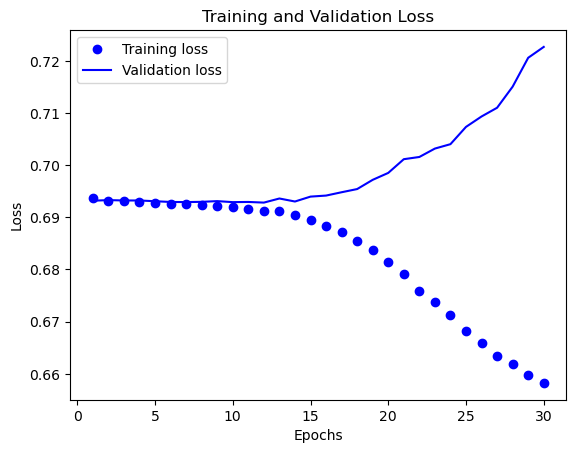

In [24]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs_range, train_losses, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs_range, val_losses, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

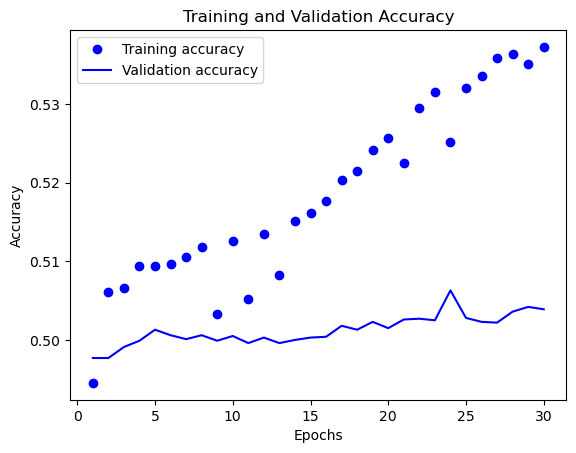

In [25]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs_range, train_accs, 'bo', label='Training accuracy')
plt.plot(epochs_range, val_accs, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
embedding_layer = model.embedding
weights = embedding_layer.weight.detach().cpu().numpy()

print(weights.shape)  # shape: (vocab_size, embedding_dim)

(10000, 16)


In [27]:
!mkdir ~/data/word2vec_emb

mkdir: cannot create directory ‘/home/jovyan/data/word2vec_emb’: Read-only file system


In [32]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다.
word2vec_file_path = os.path.join('/home/jovyan/work/sentiment_classification/word2vec_emb/word2vec.txt')

with open(word2vec_file_path, 'w') as f:
    f.write('{} {}\n'.format(vocab_size - 4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

    # 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다.
    vectors = model.embedding.weight.detach().cpu().numpy()
    for i in range(4, vocab_size):
        f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, vectors[i, :]))))

In [33]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.86801475, -0.28358766,  1.3624475 ,  1.4402554 , -0.51831466,
        0.43096063,  0.3851058 , -0.81472576,  0.8142701 , -0.13326299,
       -1.9357524 ,  1.2643183 ,  2.7997458 , -0.62906617, -0.28845093,
       -0.48359826], dtype=float32)

In [34]:
word_vectors.similar_by_word("love")

[('descent', 0.797982931137085),
 ('awe', 0.7672932147979736),
 ('gershwin', 0.7387913465499878),
 ('boots', 0.7136629819869995),
 ('sensibility', 0.700679361820221),
 ('occasionally', 0.6960392594337463),
 ('recurring', 0.6785888671875),
 ('flimsy', 0.675263524055481),
 ('ages', 0.6751934289932251),
 ('get', 0.6737344264984131)]

In [35]:
from gensim.models import KeyedVectors

word2vec_path = data_dir + 'GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [36]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

In [37]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentModel(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix, maxlen):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)    # 카피한 임베딩을 여기서 활용
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        self.conv1 = nn.Conv1d(in_channels=word_vector_dim, out_channels=16, kernel_size=7)
        self.pool = nn.MaxPool1d(kernel_size=5)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=7)
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(16, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.global_max_pool(x).squeeze(2)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수

embedding_matrix = torch.randn(vocab_size, word_vector_dim)

model = SentimentModel(vocab_size, word_vector_dim, embedding_matrix, maxlen)
print(model)

SentimentModel(
  (embedding): Embedding(10000, 300)
  (conv1): Conv1d(300, 16, kernel_size=(7,), stride=(1,))
  (pool): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 16, kernel_size=(7,), stride=(1,))
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=16, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


/tmp/ipykernel_4702/1688845905.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))


In [39]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
partial_y_train_tensor = torch.tensor(partial_y_train, dtype=torch.float)

x_val_tensor = torch.tensor(x_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.float)

train_dataset = TensorDataset(partial_x_train_tensor, partial_y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

# 학습의 진행
epochs = 20    # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.
train_losses = []
val_losses = []
train_accs = []
val_accs = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)  # cuda 또는 cpu 출력
model.to(device)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_losses.append(running_loss / len(train_loader))
    train_accs.append(correct / total)

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)

            val_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float()
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_accs.append(val_correct / val_total)

    print(f"Epoch {epoch+1}/{epochs} - "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f} - "
          f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accs[-1]:.4f}")

/tmp/ipykernel_4702/630273488.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
/tmp/ipykernel_4702/630273488.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val_tensor = torch.tensor(x_val, dtype=torch.long)


cuda
Epoch 1/20 - Train Loss: 0.6869, Train Accuracy: 0.5541 - Validation Loss: 0.6746, Validation Accuracy: 0.6229
Epoch 2/20 - Train Loss: 0.6356, Train Accuracy: 0.6896 - Validation Loss: 0.5950, Validation Accuracy: 0.7060
Epoch 3/20 - Train Loss: 0.5108, Train Accuracy: 0.7724 - Validation Loss: 0.4797, Validation Accuracy: 0.7757
Epoch 4/20 - Train Loss: 0.3844, Train Accuracy: 0.8373 - Validation Loss: 0.4155, Validation Accuracy: 0.8093
Epoch 5/20 - Train Loss: 0.2903, Train Accuracy: 0.8851 - Validation Loss: 0.3997, Validation Accuracy: 0.8217
Epoch 6/20 - Train Loss: 0.2241, Train Accuracy: 0.9156 - Validation Loss: 0.3860, Validation Accuracy: 0.8339
Epoch 7/20 - Train Loss: 0.1684, Train Accuracy: 0.9438 - Validation Loss: 0.3743, Validation Accuracy: 0.8422
Epoch 8/20 - Train Loss: 0.1281, Train Accuracy: 0.9633 - Validation Loss: 0.3858, Validation Accuracy: 0.8434
Epoch 9/20 - Train Loss: 0.0895, Train Accuracy: 0.9801 - Validation Loss: 0.3936, Validation Accuracy: 0.8

In [40]:
# 테스트셋을 통한 모델 평가
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0

x_test_tensor = torch.tensor(x_test_padded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)

        test_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_correct / test_total:.4f}")

Test Loss: 0.6559, Test Accuracy: 0.8470


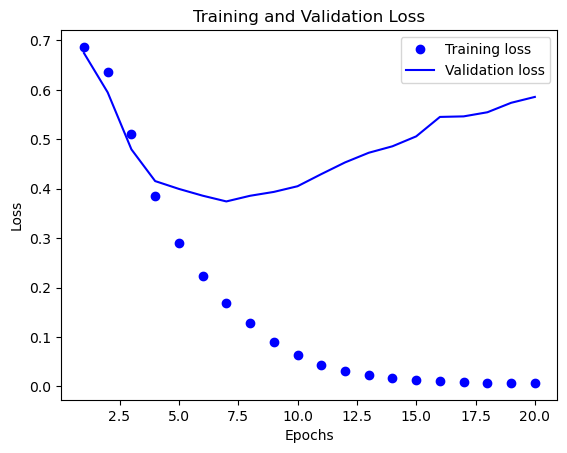

In [41]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs_range, train_losses, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs_range, val_losses, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

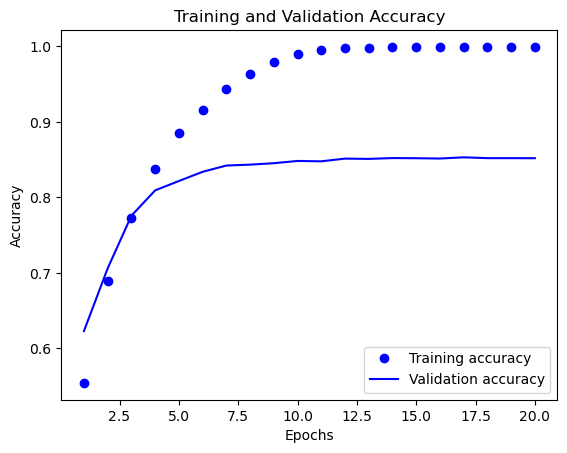

In [42]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs_range, train_accs, 'bo', label='Training accuracy')
plt.plot(epochs_range, val_accs, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
!mv --help

Usage: mv [OPTION]... [-T] SOURCE DEST
  or:  mv [OPTION]... SOURCE... DIRECTORY
  or:  mv [OPTION]... -t DIRECTORY SOURCE...
Rename SOURCE to DEST, or move SOURCE(s) to DIRECTORY.

Mandatory arguments to long options are mandatory for short options too.
      --backup[=CONTROL]       make a backup of each existing destination file
  -b                           like --backup but does not accept an argument
      --debug                  explain how a file is copied.  Implies -v
  -f, --force                  do not prompt before overwriting
  -i, --interactive            prompt before overwrite
  -n, --no-clobber             do not overwrite an existing file
If you specify more than one of -i, -f, -n, only the final one takes effect.
      --no-copy                do not copy if renaming fails
      --strip-trailing-slashes  remove any trailing slashes from each SOURCE
                                 argument
  -S, --suffix=SUFFIX          override the usual backup suffix
  -t, --tar

In [11]:
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
# !mv -f ratings_*.txt /home/jovyan/data

!pip install konlpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 71.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [konlpy]2m2/3 [konlpy]


In [12]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/home/jovyan/work/haji/workplace/AIFFEL_quest_rs/Exploration/Ex05/Mecab-ko-for-Google-Colab
install_mecab-ko_on_colab_light_220429.sh: line 4: cd: /content: No such file or directory
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2026-01-29 14:32:09--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.136, 13.200.41.134, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-01-29 14:32:10 ERROR 404: Not Found.

Done
Unpacking mecab-0.996-ko-0.9.2.tar.gz.......
Done
Change Directory to mecab-0.996-ko-0.9.2.......
install_mecab-ko_on_colab_light_220429.sh: line 23: cd: mecab-0.996-ko-0.9.2/: No such file or

In [8]:
import pandas as pd
import os
# 데이터를 읽어봅시다.
train_data = pd.read_table(os.getenv("HOME") + '/work/sentiment_classification/ratings_train.txt')
test_data = pd.read_table(os.getenv("HOME") + '/work/sentiment_classification/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [9]:

from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any')
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any')

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [10]:
data_dir = os.getenv("HOME") + '/work/sentiment_classification/ratings_train.txt'
word_to_index = np.load(data_dir, allow_pickle=True)
index_to_word = {index:word for word, index in word_to_index.items()}


UnpicklingError: Failed to interpret file '/home/jovyan/work/sentiment_classification/ratings_train.txt' as a pickle

In [ ]:


# index_to_word = {index:word for word, index in word_to_index.items()}


In [ ]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다.
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다.
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decodeWd_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [ ]:
# !pip install gensim==4.3.2
# # 의존성 연결을 위해 다운그레이드를 진행합니다.
# !pip install scipy==1.12.0 numpy==1.26.3

import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)
C
from gensim.models.keyedvectors import Word2VecKeyedVectors
word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)
vector = word_vectors.wv["끝"]

In [ ]:
#전처리를 합니다
from konlpy.tag import Mecab
import numpy as np
from collections import Counter
import os

# Explicitly provide the MeCab dictionary path
mecab_dic_path = '/usr/local/lib/mecab/dic/mecab-ko-dic'
tokenizer = Mecab(dicpath=mecab_dic_path)
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any')
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any')

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    # Reserve index 0 for padding, 1 for unknown, 2 for BOS
    counter = counter.most_common(num_words - 3)

    # Define special tokens and their indices, reserving index 0 for padding
    vocab = ['<PAD>', '<UNK>', '<BOS>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index.get(word, word_to_index['<UNK>']) for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) # y 값이 부여됨

# Convert X_train and X_test to numpy arrays after loading
# These lines are removed as conversion should happen after padding
# X_train = np.array(X_train)
# X_test = np.array(X_test)

In [11]:
# vocab의 사이즈를 파악합니다.
index_to_word = {index:word for word, index in word_to_index.items()}
print(len(index_to_word))
print(len(word_to_index))

9997
9997


In [12]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다.
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다.
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [13]:
total_data_text = list(X_train) + list(X_test) # 평균값, 최대값, 표준편차를 구하기 위해서 학습 데이터와 테스트 데이터를 일시적으로 합쳐 줍니다.
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다.
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면, 적정 padding은 41로 판단됨
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')

문장길이 평균 :  15.971004254142798
문장길이 최대 :  116
문장길이 표준편차 :  12.844081305622485
pad_sequences maxlen :  41
전체 문장의 0.9342629991962691%가 maxlen 설정값 이내에 포함됩니다. 


In [14]:
# 패딩을 부여합니다. 학습 데이터와 테스트 데이터 모두에 패딩을 부여합니다.
import torch
import numpy as np # Ensure numpy is imported here
def pad_sequences(data, maxlen):
    padded_data = []
    for sentence in data:
        if len(sentence) < maxlen:
            # Use 0 for padding as it's reserved for <PAD>
            sentence = sentence + [0] * (maxlen - len(sentence))
        else:
            sentence = sentence[:maxlen]
        padded_data.append(sentence)
    return np.array(padded_data) # Return as numpy array

X_train_padded = pad_sequences(X_train, maxlen)
X_test_padded = pad_sequences(X_test, maxlen)

# Convert numpy arrays to torch tensors AFTER padding
x_train_tensor = torch.tensor(X_train_padded, dtype=torch.long)
x_test_tensor = torch.tensor(X_test_padded, dtype=torch.long)


print(x_train_tensor.shape)
print(x_test_tensor.shape) # Add print for test tensor shape

torch.Size([146182, 41])
torch.Size([49157, 41])


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

vocab_size = 10000    # 어휘 사전의 크기입니다. voca size를 len으로 하니 안되네요. 이유는 찾아봐야겠어요.
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터로 패딩후 결과를 반영하였음)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, word_vector_dim):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)
        self.lstm = nn.LSTM(word_vector_dim, 8, batch_first=True)
        self.fc1 = nn.Linear(8, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, (hn, cn) = self.lstm(x)
        x = x[:, -1, :]
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = SentimentModel(vocab_size, word_vector_dim)
print(model)

SentimentModel(
  (embedding): Embedding(10000, 16)
  (lstm): LSTM(16, 8, batch_first=True)
  (fc1): Linear(in_features=8, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [16]:
# validation set을 처음부터 분리
x_val = x_train_tensor[:29236] # 146182 *  20% 해서 29236만을 설정
y_val = y_train[:29236]

# validation set을 제외한 나머지 146128 - 30000 = 116128 건을 학습 데이터로 분류
partial_x_train = x_train_tensor[29236:]
partial_y_train = y_train[29236:]

print(partial_x_train.shape)
print(partial_y_train.shape)

torch.Size([116946, 41])
(116946,)


In [17]:
# 모델 1을 학습시켜봅니다. validation 결과를 살펴봅니다.
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

optimizer = optim.Adam(model.parameters())
loss_fn = torch.nn.BCELoss()

partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
partial_y_train_tensor = torch.tensor(partial_y_train, dtype=torch.float)

x_val_tensor = torch.tensor(x_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.float)

train_dataset = TensorDataset(partial_x_train_tensor, partial_y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

epochs = 40   # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        predicted = (outputs.squeeze() > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_losses.append(running_loss / len(train_loader))
    train_accs.append(correct / total)

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)

            val_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float()
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_accs.append(val_correct / val_total)

    print(f"Epoch {epoch+1}/{epochs} - "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f} - "
          f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accs[-1]:.4f}")

/tmp/ipykernel_6639/960803750.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  partial_x_train_tensor = torch.tensor(partial_x_train, dtype=torch.long)
/tmp/ipykernel_6639/960803750.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val_tensor = torch.tensor(x_val, dtype=torch.long)


Epoch 1/40 - Train Loss: 0.6931, Train Accuracy: 0.5034 - Validation Loss: 0.6928, Validation Accuracy: 0.5023
Epoch 2/40 - Train Loss: 0.6814, Train Accuracy: 0.5610 - Validation Loss: 0.6567, Validation Accuracy: 0.6312
Epoch 3/40 - Train Loss: 0.6573, Train Accuracy: 0.6158 - Validation Loss: 0.6417, Validation Accuracy: 0.6568
Epoch 4/40 - Train Loss: 0.6237, Train Accuracy: 0.6685 - Validation Loss: 0.6122, Validation Accuracy: 0.6769
Epoch 5/40 - Train Loss: 0.6177, Train Accuracy: 0.6768 - Validation Loss: 0.6057, Validation Accuracy: 0.6948
Epoch 6/40 - Train Loss: 0.5968, Train Accuracy: 0.7014 - Validation Loss: 0.5827, Validation Accuracy: 0.7142
Epoch 7/40 - Train Loss: 0.5684, Train Accuracy: 0.7258 - Validation Loss: 0.5704, Validation Accuracy: 0.7256
Epoch 8/40 - Train Loss: 0.5488, Train Accuracy: 0.7371 - Validation Loss: 0.5480, Validation Accuracy: 0.7412
Epoch 9/40 - Train Loss: 0.5255, Train Accuracy: 0.7499 - Validation Loss: 0.5285, Validation Accuracy: 0.7485
E

In [18]:
#테스트 셋으로 모델 1의 퍼포먼스를 테스트 해봅니다.
test_dataset = TensorDataset(x_test_tensor, torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)

        test_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_correct / test_total:.4f}")

Test Loss: 0.3976, Test Accuracy: 0.8398


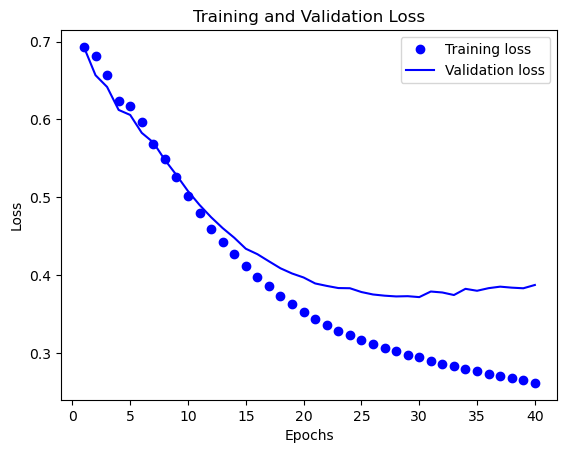

In [19]:
#모델 1에 대한 그림입니다
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs_range, train_losses, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs_range, val_losses, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 루브릭 

In [20]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter
from torch.nn.utils.rnn import pad_sequence

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any')
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any')

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    # y_train = list(train_data['label'])
    # if data_insert == True:
    #     for sentence, target in zip(train_data['document'], train_data['label']):
    #         aug = naw.ContextualWordEmbsAug(model_path='beomi/kcbert-base', action='insert', device=device)
    #         synon = str(aug.augment(sentence)[0])
    #         temp_X_synon = tokenizer.morphs(synon) # tokenization
    #         temp_X_synon = [wordS for wordS in temp_X if not wordS in stopwords] # 불용어 제거
    #         X_train.append(temp_X_synon)
    #         y_train.append(target)
    
    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [21]:
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
index_to_word = {index:word for word, index in word_to_index.items()}

In [22]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다.
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다.
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [23]:
# 문장 최대 길이 확인
total_data_text = list(X_train) + list(X_test)
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

max_tokens = np.mean(num_tokens) + 2* np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f"전체 문장의 {np.sum(num_tokens < max_tokens)/len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다.")

문장길이 평균 :  15.971004254142798
문장길이 최대 :  116
문장길이 표준편차 :  12.844081305622485
pad_sequences maxlen :  41
전체 문장의 0.9342629991962691%가 maxlen 설정값 이내에 포함됩니다.


In [24]:
# padding하기 위해서 tensor로 변경
total_data_tensor = [torch.tensor(sentence, dtype=torch.long) for sentence in (list(X_train) + list(X_test))]

# padding
total_data_tensor = pad_sequence(total_data_tensor, batch_first=True, padding_value=word_to_index['<PAD>'], padding_side='left')
X_train_padded = total_data_tensor[:len(X_train)]
X_test_padded = total_data_tensor[len(X_train):]

print(X_train_padded.shape)
print(len(X_train))

torch.Size([146182, 116])
146182


In [25]:

total_data_text = list(X_train_padded) + list(X_test_padded)
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

max_tokens = np.mean(num_tokens) + 2* np.std(num_tokens)
maxlen = int(max_tokens)

In [26]:
# model들 정의
class model_1(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, hidden_dim=128,num_layers=2, dropout=0.1, embedding_matrix=None, pad_idx=None, bidirectional=False):
        super(model_1,self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim, padding_idx=pad_idx if pad_idx is not None else None)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
            self.embedding.weight.requires_grad=True
        self.lstm = nn.LSTM(word_vector_dim, hidden_size=hidden_dim, num_layers=num_layers, dropout=dropout if num_layers > 1 else 0.0, batch_first=True,bidirectional=bidirectional)

        lstm_out_dim = hidden_dim * (2 if bidirectional else 1) 
        
        self.dropout1 = nn.Dropout(dropout)
        self.fc1 = nn.Linear(lstm_out_dim, hidden_dim // 2)
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_dim // 2, 32)
        self.dropout3 = nn.Dropout(dropout)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        x = h_n[-1]
        x = self.dropout1(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

class model_2(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix=None):
        super(model_2, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
            self.embedding.weight.requires_grad=True
        self.conv1 = nn.Conv1d(word_vector_dim, 16, kernel_size=7)
        self.conv2 = nn.Conv1d(16,16, kernel_size=7)
        self.pool = nn.MaxPool1d(5)
        self.global_max_pooling = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(16, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0,2,1)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.global_max_pooling(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

class model_3(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix=None):
        super(model_3, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
            self.embedding.weight.requires_grad=True
        self.global_max_pooling = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(word_vector_dim, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0,2,1)
        x = self.global_max_pooling(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [27]:

from torch.utils.data import TensorDataset, DataLoader, random_split
import copy
def train_val_loss_visualization(train_losses, val_losses, epochs=20):
    epochs_range = range(1, epochs + 1)

    if len(train_losses) < epochs:
        for i in range(epochs - len(train_losses)):
            train_losses.append(train_losses[-1])

    if len(val_losses) < epochs:
        for i in range(epochs - len(val_losses)):
            val_losses.append(val_losses[-1])
    
    plt.plot(epochs_range, train_losses, 'bo', label='Training loss')
    plt.plot(epochs_range, val_losses, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def train_val_accs_visualization(train_accs, val_accs, epochs=20):
    epochs_range = range(1, epochs + 1)

    if len(train_accs) < epochs:
        for i in range(epochs - len(train_accs)):
            train_accs.append(train_accs[-1])

    if len(val_accs) < epochs:
        for i in range(epochs - len(val_accs)):
            val_accs.append(val_accs[-1])
    
    plt.clf()
    
    plt.plot(epochs_range, train_accs, 'bo', label='Training accuracy')
    plt.plot(epochs_range, val_accs, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# train 함수 모듈화
def train(X_train, y_train, model, epochs=20,vocab_size = 10000,word_vector_dim = 100, embedding_matrix=None, train_ratio=0.8, batch_size=512,lr = 0.001, verbose=1, num_layers=None,patience=4):
    dataset = TensorDataset(X_train, y_train)
    
    train_size = int(len(X_train) * train_ratio)
    val_size = len(X_train) - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    if num_layers is None:
        model = model(vocab_size, word_vector_dim, embedding_matrix=embedding_matrix)
    else:
        model = model(vocab_size, word_vector_dim, embedding_matrix=embedding_matrix, num_layers=num_layers)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(device)
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = torch.nn.BCELoss()

    best_param = dict()
    best_loss = float('inf')
    early_stop_counter = -1

    epochs_count = 0

    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        #epoch마다 random으로 섞이게 함
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        epochs_count += 1
    
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
    
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
            predicted = (outputs.squeeze() > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
        train_losses.append(running_loss / len(train_loader))
        train_accs.append(correct/total)
    
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
    
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                loss = loss_fn(outputs.squeeze(), labels)
    
                val_loss += loss.item()
                predicted = (outputs.squeeze() > 0.5).float()
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)
                
        # Early Stopping 조건
        if val_loss < best_loss:
            best_loss = val_loss
            best_param = copy.deepcopy(model.state_dict())
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break
        val_losses.append(val_loss / len(val_loader))
        val_accs.append(val_correct / val_total)
        if epoch % verbose == 0:
            print(f"Epoch {epoch+1}/{epochs} - "
                  f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f} - "
                  f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accs[-1]:.4f}")

    #loss/acc 시각화
    train_val_loss_visualization(train_losses, val_losses, epochs=epochs_count)
    train_val_accs_visualization(train_accs, val_accs, epochs=epochs_count)
    model.load_state_dict(best_param)
    # 메모리 정리
    del optimizer, loss_fn
    return model

# test 함수 모듈화
def test(X_test, y_test, model, batch_size=512):
    dataset = TensorDataset(X_test, y_test)

    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(device)
    #model.to(device)

    loss_fn = torch.nn.BCELoss()
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
    
            test_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float()
            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)
    
    print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_correct / test_total:.4f}")

/tmp/ipykernel_6639/672739725.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_padded_tensor = torch.tensor(X_train_padded, dtype=torch.long)


cuda
Epoch 1/50 - Train Loss: 0.4804, Train Accuracy: 0.7605 - Validation Loss: 0.3833, Validation Accuracy: 0.8257
Epoch 2/50 - Train Loss: 0.3510, Train Accuracy: 0.8456 - Validation Loss: 0.3539, Validation Accuracy: 0.8422
Epoch 3/50 - Train Loss: 0.3076, Train Accuracy: 0.8686 - Validation Loss: 0.3319, Validation Accuracy: 0.8543
Epoch 4/50 - Train Loss: 0.2781, Train Accuracy: 0.8832 - Validation Loss: 0.3249, Validation Accuracy: 0.8601
Epoch 5/50 - Train Loss: 0.2509, Train Accuracy: 0.8969 - Validation Loss: 0.3257, Validation Accuracy: 0.8577
Epoch 6/50 - Train Loss: 0.2260, Train Accuracy: 0.9090 - Validation Loss: 0.3429, Validation Accuracy: 0.8601
Epoch 7/50 - Train Loss: 0.2030, Train Accuracy: 0.9191 - Validation Loss: 0.3468, Validation Accuracy: 0.8584
Early stopping triggered at epoch 8


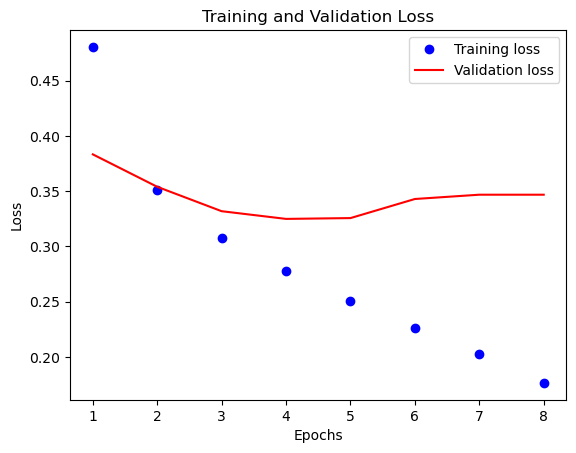

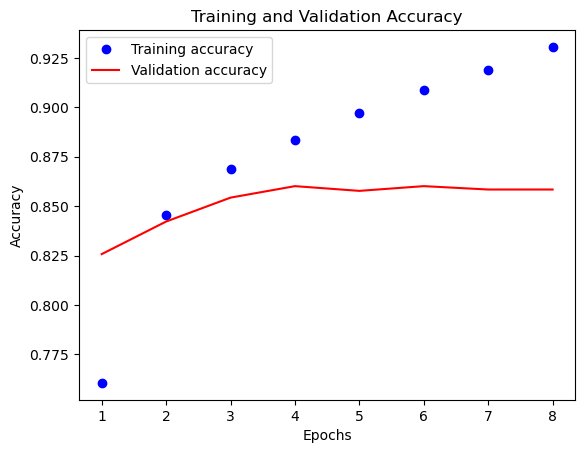

In [28]:
X_train_padded_tensor = torch.tensor(X_train_padded, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float)

#model1 학습
model1 = train(X_train_padded_tensor,y_train_tensor,model_1,epochs=50,vocab_size = len(index_to_word),train_ratio=0.90, num_layers=2)

cuda
Epoch 1/15 - Train Loss: 0.5453, Train Accuracy: 0.7070 - Validation Loss: 0.4203, Validation Accuracy: 0.8020
Epoch 2/15 - Train Loss: 0.3827, Train Accuracy: 0.8275 - Validation Loss: 0.3679, Validation Accuracy: 0.8354
Epoch 3/15 - Train Loss: 0.3343, Train Accuracy: 0.8548 - Validation Loss: 0.3523, Validation Accuracy: 0.8466
Epoch 4/15 - Train Loss: 0.3054, Train Accuracy: 0.8705 - Validation Loss: 0.3521, Validation Accuracy: 0.8469
Epoch 5/15 - Train Loss: 0.2818, Train Accuracy: 0.8819 - Validation Loss: 0.3502, Validation Accuracy: 0.8506
Epoch 6/15 - Train Loss: 0.2643, Train Accuracy: 0.8916 - Validation Loss: 0.3549, Validation Accuracy: 0.8513
Epoch 7/15 - Train Loss: 0.2469, Train Accuracy: 0.9005 - Validation Loss: 0.3687, Validation Accuracy: 0.8490
Epoch 8/15 - Train Loss: 0.2307, Train Accuracy: 0.9079 - Validation Loss: 0.3797, Validation Accuracy: 0.8464
Early stopping triggered at epoch 9


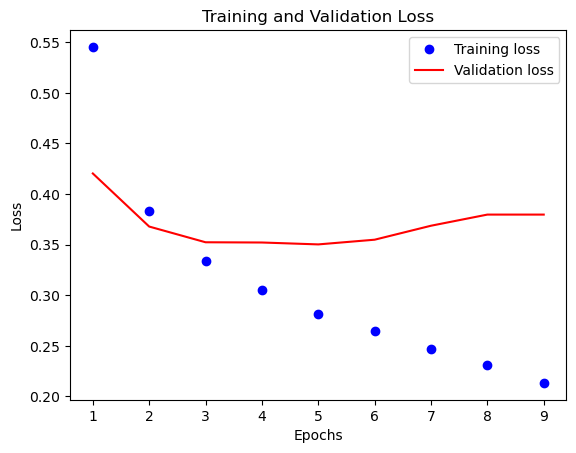

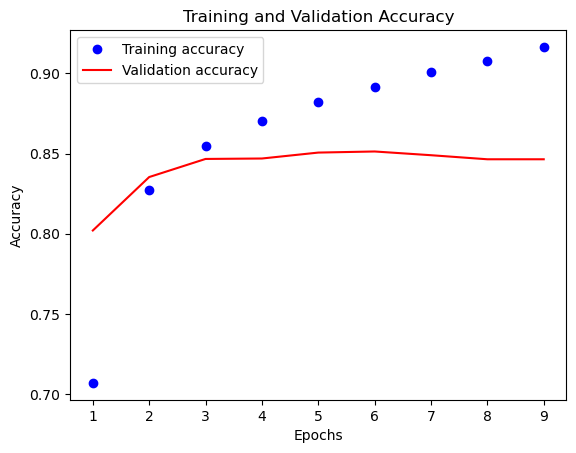

In [29]:
#model2 학습
model2 = train(X_train_padded_tensor,y_train_tensor,model_2,epochs=15,vocab_size = len(index_to_word),train_ratio=0.90)

cuda
Epoch 1/15 - Train Loss: 0.6401, Train Accuracy: 0.6360 - Validation Loss: 0.5575, Validation Accuracy: 0.7208
Epoch 2/15 - Train Loss: 0.4958, Train Accuracy: 0.7596 - Validation Loss: 0.4698, Validation Accuracy: 0.7757
Epoch 3/15 - Train Loss: 0.4283, Train Accuracy: 0.8014 - Validation Loss: 0.4325, Validation Accuracy: 0.7982
Epoch 4/15 - Train Loss: 0.3932, Train Accuracy: 0.8215 - Validation Loss: 0.4100, Validation Accuracy: 0.8128
Epoch 5/15 - Train Loss: 0.3685, Train Accuracy: 0.8364 - Validation Loss: 0.4021, Validation Accuracy: 0.8190
Epoch 6/15 - Train Loss: 0.3506, Train Accuracy: 0.8465 - Validation Loss: 0.3897, Validation Accuracy: 0.8266
Epoch 7/15 - Train Loss: 0.3360, Train Accuracy: 0.8549 - Validation Loss: 0.3879, Validation Accuracy: 0.8289
Epoch 8/15 - Train Loss: 0.3234, Train Accuracy: 0.8618 - Validation Loss: 0.3835, Validation Accuracy: 0.8325
Epoch 9/15 - Train Loss: 0.3119, Train Accuracy: 0.8673 - Validation Loss: 0.3800, Validation Accuracy: 0.8

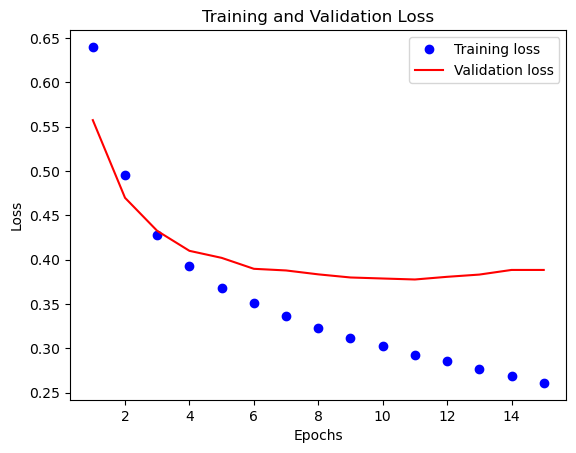

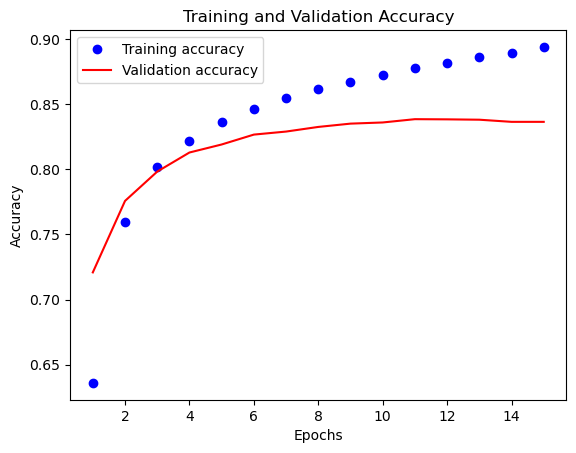

In [33]:
#model3 학습
model3 = train(X_train_padded_tensor,y_train_tensor,model_3,epochs=15,vocab_size = len(index_to_word),train_ratio=0.90)

In [30]:
# 각각 embedding layer shape 확인
embedding_layer = model1.embedding
weights1 = embedding_layer.weight.detach().cpu().numpy()


In [31]:
# 각각 embedding layer shape 확인
embedding_layer = model2.embedding
weights2 = embedding_layer.weight.detach().cpu().numpy()

In [34]:
# 각각 embedding layer shape 확인
embedding_layer = model3.embedding
weights3 = embedding_layer.weight.detach().cpu().numpy()

In [35]:

from numpy.linalg import norm

token_to_embedding = dict()

for index, embedding in enumerate(weights1):
    token_to_embedding[index_to_word[index]] = embedding
    
token = "끝"
token_embedding = token_to_embedding[token]
print(token)
print(token_embedding)

def cosine_similarity(a, b):
    cosine = np.dot(b, a) / (norm(b, axis=1)*norm(a))
    return cosine
    
def top_n_index(cosine_matrix, n):
    closest_indexes = cosine_matrix.argsort()[::-1]
    top_n = closest_indexes[1 : n +1]
    return top_n
    
cosine_matrix = cosine_similarity(token_embedding, weights1)
top_n = top_n_index(cosine_matrix, 5)

print(f"{token}와 가장 유사한 5개 단어")
for index in top_n:
    print(f"{index_to_word[index]} - similarity : {cosine_matrix[index] : .4f}")

끝
[-1.2803729   0.3255492   0.21176638 -0.682445   -0.31584775  0.64725935
  0.34900963  1.018475    0.2721909  -0.7223943  -1.254412    0.76408744
 -0.03100683  1.1505708  -0.20113732  0.2960227   0.37723485  2.9392745
 -0.28510392  0.28353652 -1.3844028  -1.3150948   0.7179711  -0.07290058
 -0.3640221   1.1390332  -0.05903181 -2.687103    0.1772798  -1.1848872
  0.58063084  0.39870176  0.56426895 -0.7828827  -0.27498445  0.535551
 -0.08341741  0.27578166  0.67301697 -0.9072918   0.95794946  1.3302674
  0.1099525   0.9110227   2.111344   -0.08563694  1.6268907   0.4917047
 -0.6126175  -0.12989402 -0.8407425  -0.6440913   0.658857   -0.57915497
 -0.2828854  -0.27513567 -1.7093794   0.4565815   0.13337381 -0.5924692
 -0.07845683 -0.86383605  0.38567936  0.9274024  -0.622326    0.66445553
 -2.105581    0.11637031 -1.0645884  -0.5104716   1.480308    0.14168589
 -0.8150496  -1.7004579   0.7778954  -0.39126197  0.10306082 -0.43834472
 -0.21622716  1.3276112   0.8679196   0.37173682 -1.1018

In [36]:

token_to_embedding = dict()

for index, embedding in enumerate(weights2):
    token_to_embedding[index_to_word[index]] = embedding
    
token = "끝"
token_embedding = token_to_embedding[token]
print(token)

cosine_matrix = cosine_similarity(token_embedding, weights2)
top_n = top_n_index(cosine_matrix, 5)

print(f"{token}와 가장 유사한 5개 단어")
for index in top_n:
    print(f"{index_to_word[index]} - similarity : {cosine_matrix[index] : .4f}")

끝
끝와 가장 유사한 5개 단어
전문 - similarity :  0.3677
전우치 - similarity :  0.3418
오 - similarity :  0.3411
끌어가 - similarity :  0.3313
애틋 - similarity :  0.3275


In [37]:
token_to_embedding = dict()

for index, embedding in enumerate(weights3):
    token_to_embedding[index_to_word[index]] = embedding
    
token = "끝"
token_embedding = token_to_embedding[token]
    
cosine_matrix = cosine_similarity(token_embedding, weights3)
top_n = top_n_index(cosine_matrix, 5)

print(f"{token}와 가장 유사한 5개 단어")
for index in top_n:
    print(f"{index_to_word[index]} - similarity : {cosine_matrix[index] : .4f}")

끝와 가장 유사한 5개 단어
수레 - similarity :  0.3488
탱고 - similarity :  0.3449
실컷 - similarity :  0.3392
폴리스 - similarity :  0.3378
벗어난 - similarity :  0.3375


In [42]:

from gensim.models.keyedvectors import Word2VecKeyedVectors
# pretrained 된 embedding matrix 가져오기
word2vec_file_path = os.path.join(os.getenv('HOME') + '/work/sentiment_classification/word2vec_ko.model')

word2vec = Word2VecKeyedVectors.load(word2vec_file_path).wv
# 맞는 겍체인지 확인하고 기능 확인
word2vec.similar_by_word("끝")

vocab_size = 10000    # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 100  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

print(embedding_matrix[word_to_index["끝"]])

[ 1.03885102 -1.16349649  2.23862863  0.89714527 -2.08816791 -4.19425344
 -0.02519768 -0.69813883 -0.29080331 -1.4651134  -2.6863668   0.79994428
 -0.69579148 -0.50187749  3.5025773   0.21326113 -0.65880978 -1.19004965
  0.61399573  2.12479687  0.1549463   3.08402181  3.16802669 -3.91439915
  3.6073153   0.53155452 -0.3511633  -1.10724795  1.77671814 -0.95981866
  2.60724545 -0.00697957 -3.27627993  1.55864406  0.81922376  1.92319548
  3.70265532 -0.53824735 -0.49201381  2.46571231 -2.620749   -0.08950733
  0.61453176  1.88664258  0.257866   -2.78271413  2.91295767 -0.63131332
  2.03874254 -4.22268486 -2.7560544   1.79032433 -1.30801892 -2.55314016
 -0.43849912 -3.10735726 -0.29090825  5.18176174  1.96048331 -5.14216042
 -0.71431434  4.56246328 -0.55525815 -3.30191374  1.67613363 -1.9606539
 -0.2726863   0.2465995   1.26850915  1.60556853  1.83448958  1.27524686
  0.99503314 -2.33487058 -0.92903292 -1.59202659  5.69383383  1.11328137
 -0.96038753 -1.97005498 -1.01202667 -2.72896147 -2.

In [ ]:

import gc
del model1,model2,model3,
torch.cuda.empty_cache()
gc.collect()

cuda
Epoch 1/500 - Train Loss: 0.6152, Train Accuracy: 0.6549 - Validation Loss: 0.5119, Validation Accuracy: 0.7550
Epoch 6/500 - Train Loss: 0.3755, Train Accuracy: 0.8341 - Validation Loss: 0.3752, Validation Accuracy: 0.8334
Epoch 11/500 - Train Loss: 0.3257, Train Accuracy: 0.8599 - Validation Loss: 0.3433, Validation Accuracy: 0.8507
Epoch 16/500 - Train Loss: 0.2908, Train Accuracy: 0.8778 - Validation Loss: 0.3355, Validation Accuracy: 0.8554
Epoch 21/500 - Train Loss: 0.2666, Train Accuracy: 0.8895 - Validation Loss: 0.3318, Validation Accuracy: 0.8622
Epoch 26/500 - Train Loss: 0.2464, Train Accuracy: 0.8999 - Validation Loss: 0.3325, Validation Accuracy: 0.8633
Early stopping triggered at epoch 27


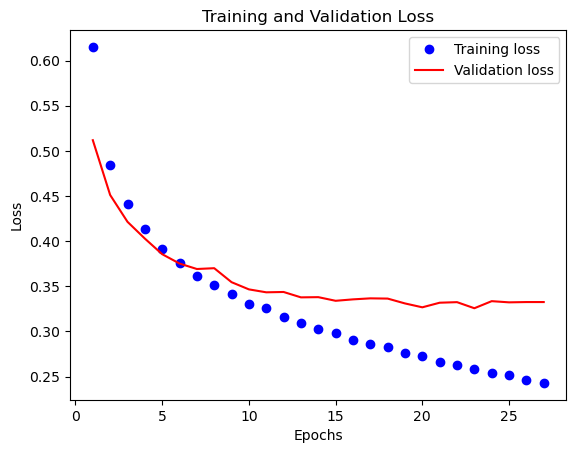

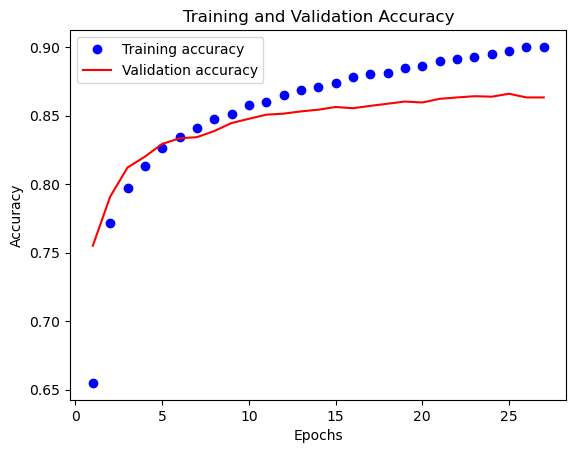

In [47]:
# 모델1에 embedding matrix 적용, learning rate을 낮춰서 안정적으로 학습하기. 그에 따라서 epoch를 늘리기. val_loss기준으로 best param만 가져감으로 epoch를 늘려도 상관 없음
model1_w2v = train(X_train_padded_tensor,y_train_tensor,model_1,epochs=500,embedding_matrix=embedding_matrix,vocab_size = len(index_to_word), lr=0.0001, verbose = 5,train_ratio=0.9,num_layers=4)

cuda
Epoch 1/500 - Train Loss: 0.6779, Train Accuracy: 0.5824 - Validation Loss: 0.6341, Validation Accuracy: 0.6707
Epoch 6/500 - Train Loss: 0.4594, Train Accuracy: 0.7862 - Validation Loss: 0.4638, Validation Accuracy: 0.7807
Epoch 11/500 - Train Loss: 0.4013, Train Accuracy: 0.8206 - Validation Loss: 0.4247, Validation Accuracy: 0.8038
Epoch 16/500 - Train Loss: 0.3634, Train Accuracy: 0.8409 - Validation Loss: 0.4019, Validation Accuracy: 0.8154
Epoch 21/500 - Train Loss: 0.3358, Train Accuracy: 0.8551 - Validation Loss: 0.3879, Validation Accuracy: 0.8260
Epoch 26/500 - Train Loss: 0.3147, Train Accuracy: 0.8656 - Validation Loss: 0.3798, Validation Accuracy: 0.8312
Epoch 31/500 - Train Loss: 0.2979, Train Accuracy: 0.8744 - Validation Loss: 0.3768, Validation Accuracy: 0.8333
Epoch 36/500 - Train Loss: 0.2838, Train Accuracy: 0.8816 - Validation Loss: 0.3772, Validation Accuracy: 0.8373
Early stopping triggered at epoch 39


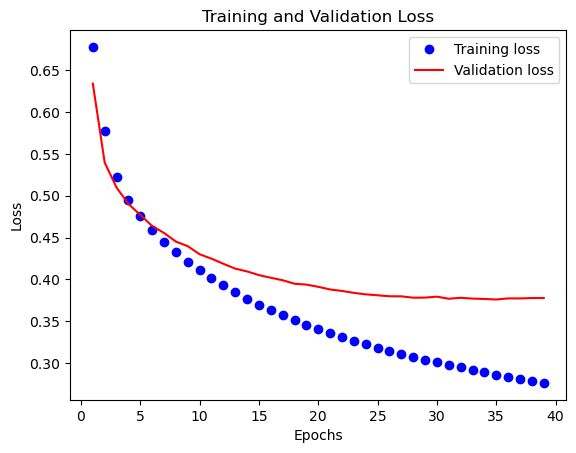

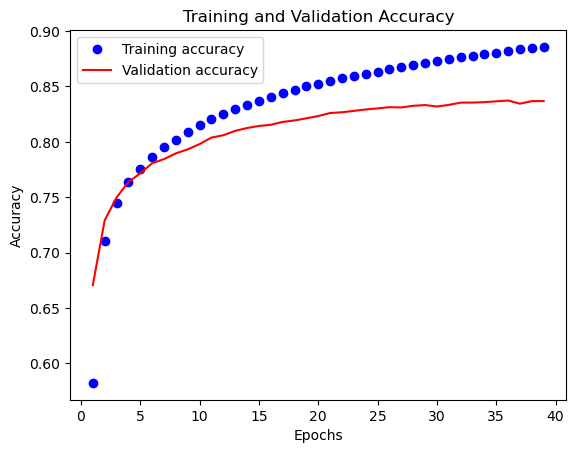

In [48]:
# 모델2에 embedding matrix 적용
model2_w2v = train(X_train_padded_tensor,y_train_tensor,model_2,epochs=500,embedding_matrix=embedding_matrix,vocab_size = len(index_to_word), lr=0.0001, verbose = 5,train_ratio=0.9)

cuda
Epoch 1/500 - Train Loss: 0.7169, Train Accuracy: 0.5167 - Validation Loss: 0.6924, Validation Accuracy: 0.5422
Epoch 6/500 - Train Loss: 0.6286, Train Accuracy: 0.6515 - Validation Loss: 0.6268, Validation Accuracy: 0.6544
Epoch 11/500 - Train Loss: 0.5928, Train Accuracy: 0.6859 - Validation Loss: 0.5943, Validation Accuracy: 0.6863
Epoch 16/500 - Train Loss: 0.5722, Train Accuracy: 0.7031 - Validation Loss: 0.5761, Validation Accuracy: 0.6972
Epoch 21/500 - Train Loss: 0.5569, Train Accuracy: 0.7150 - Validation Loss: 0.5617, Validation Accuracy: 0.7084
Epoch 26/500 - Train Loss: 0.5435, Train Accuracy: 0.7248 - Validation Loss: 0.5495, Validation Accuracy: 0.7174
Epoch 31/500 - Train Loss: 0.5311, Train Accuracy: 0.7344 - Validation Loss: 0.5372, Validation Accuracy: 0.7272
Epoch 36/500 - Train Loss: 0.5197, Train Accuracy: 0.7437 - Validation Loss: 0.5271, Validation Accuracy: 0.7358
Epoch 41/500 - Train Loss: 0.5094, Train Accuracy: 0.7495 - Validation Loss: 0.5182, Validati

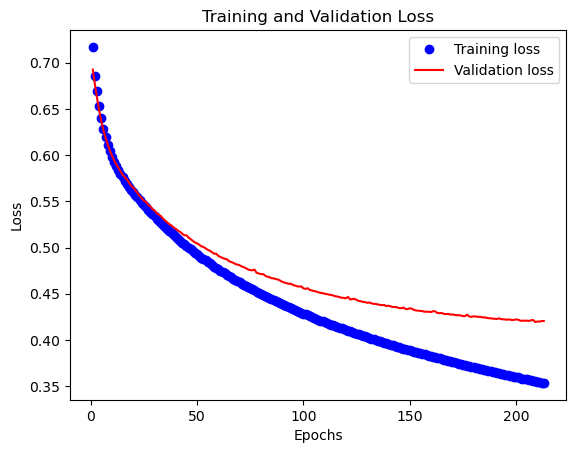

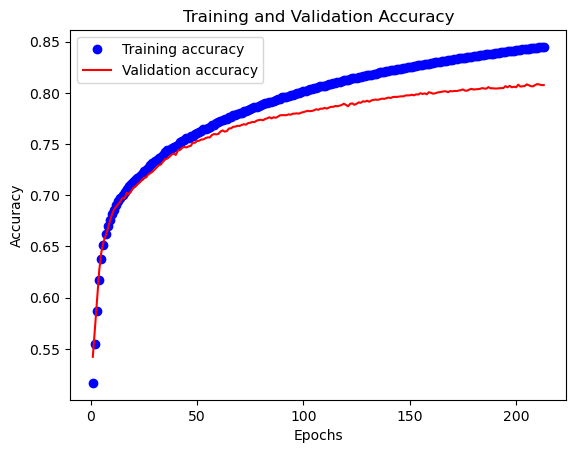

In [49]:
# 모델3에 embedding matrix 적용
model3_w2v = train(X_train_padded_tensor,y_train_tensor,model_3,epochs=500,embedding_matrix=embedding_matrix,vocab_size = len(index_to_word), lr=0.0001, verbose = 5,train_ratio=0.9)

In [50]:
X_test_padded_tensor = torch.tensor(X_test_padded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float)

test(X_test_padded_tensor,y_test_tensor,model1_w2v)

/tmp/ipykernel_6639/3427543325.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_padded_tensor = torch.tensor(X_test_padded, dtype=torch.long)


cuda
Test Loss: 0.3301, Test Accuracy: 0.8605


In [51]:
test(X_test_padded_tensor,y_test_tensor,model2_w2v)

cuda
Test Loss: 0.3767, Test Accuracy: 0.8372


In [52]:
test(X_test_padded_tensor,y_test_tensor,model3_w2v)


cuda
Test Loss: 0.4242, Test Accuracy: 0.8085


In [ ]:

!pip install gensim==4.3.2
!pip install scipy==1.12.0 numpy==1.26.3


AttributeError: module 'numpy' has no attribute '_no_nep50_warning'


1. 초기 모델 성능 분석 (Baseline)

현황: 3가지 모델 모두 Test Accuracy 80% 달성했으나, 83%의 벽(Plateau)을 넘지 못함.

특이점:

Embedding Matrix 적용 시 RNN 계열의 Loss는 유의미하게 감소했으나, 이것이 Accuracy 향상으로 직결되지는 않음 (Overconfidence 가능성).

Model Comparison: Loss 안정성은 Model 3가 우수하나, 실질적인 예측 정확도는 Model 1이 우위.

2. 기술적 트러블슈팅 (Troubleshooting)

Padding 전략: 기본값(Right Padding) 사용 시 성능 저하 및 Embedding 학습 불가 현상 발생. RNN의 순차적 특성을 고려하여 Left Padding으로 변경 후 정상 학습 확인.

3. 성능 개선 시도 (Experiments)

성공 (Model Scaling): Model 1의 **Layer Depth(깊이)**를 증가시킴. → 모델의 표현력이 향상되어 83%의 벽을 뚫고 최종 성능 개선 성공.

실패 (Data Augmentation): nlpaug를 통한 데이터 증강 시도.

결과: 오히려 성능 하락. 심지어 Depth가 깊은 모델에서도 성능 저하 발생.

원인: 증강된 데이터의 품질(신뢰성)이 낮아 노이즈로 작용함.

제언: 단순 증강보다는 고품질 데이터 확보가 중요하며, 향후 LLM 기반의 고도화된 증강 기법(Paraphrasing 등) 도입 고려 필요.